In [1]:
import pandas as pd
import json
import numpy as np

In [122]:
# Import data
train = pd.read_json('train.json')

# Let's have a look at out data
print(train.head())
print('')
print(train.shape)

                                                post  age  gender
0                          ooh shiny new commenting!   16  female
1  so wuts up? today i had the parade. suked. but...   14    male
2  i don't know about anyone else anymore, but i'...   24  female
3  urlLink    another roof-top sunset  Posted by ...   24    male
4  gawd i luv my nanny!  she's absolutely the gre...   23  female

(526812, 3)


In [21]:
train.loc[3].post

'urlLink    another roof-top sunset  Posted by Paul'

In [123]:
import matplotlib.pyplot as plt

train['length'] = train['post'].apply(len)
# train[train.length >= 80000]

In [75]:
train.isna().sum()

post      0
age       0
gender    0
length    0
dtype: int64

<AxesSubplot:>

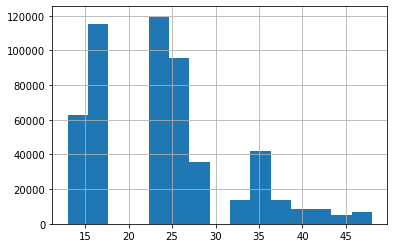

In [48]:
train.age.hist(bins = 15)

In [65]:
print(len(train[train.age <= 17]))                        # Class 1
print(len(train[(train.age >= 23) & (train.age <= 27)]))  # Class 2
print(len(train[(train.age >= 28) & (train.age <= 48)]))  # Class 3

177940
250672
98200


In [124]:
# Double Check
train['age_class'] = pd.cut(
        train["age"],
        bins=[12, 18, 28, 50],
        labels=[0, 1, 2]
    ).astype("int")

In [83]:
train.iloc[526809]

post      I also prefer calling you a nice guy.  In fact...
age                                                      13
gender                                                 male
length                                                  763
Name: 526809, dtype: object

In [136]:
train.head(6)

,post,age,gender,length,age_class,new_post,new_length
0,ooh shiny new commenting!,16,female,25,0,ooh shiny new commenting!,25
1,so wuts up? today i had the parade. suked. but...,14,male,245,0,wuts up? today parade. suked. wasnt bad. im ba...,163
2,"i don't know about anyone else anymore, but i'...",24,female,462,1,"don't know anymore, i'm concerned everyday. wa...",305
3,urlLink another roof-top sunset Posted by ...,24,male,50,1,urlLink roof-top sunset Posted Paul,35
4,gawd i luv my nanny! she's absolutely the gre...,23,female,3656,1,gawd luv nanny! she's absolutely greatest woma...,2009
5,"7._ Km, 39:19.4, Partly cloudy -4C, 6 km wind ...",41,male,136,2,"7._ Km, 39:19.4, Partly cloudy -4C, 6 km wind ...",106


In [121]:
# Prima opzione: 179 parole vietate
import nltk
from nltk.corpus import stopwords

sw_nltk = stopwords.words('english')

# Seconda opzione: 326
import spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

In [125]:
# Delete stop words
def delete_stopwords(text):
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text

# Create new columns with new text and new length
train['new_post'] = train['post'].apply(delete_stopwords)
train['new_length'] = train['new_post'].apply(len)

In [141]:
from spacy import tokenizer
from spacy.lang.en import English
nlp = English()
tkz = tokenizer.Tokenizer(nlp.vocab)

In [147]:
# Tokenization
def word_tokenization(text):
    return [word.text for word in tkz(text)]

# Create new column with tokenized text
train['token_post'] = train['new_post'].apply(word_tokenization)

In [148]:
train.head()

,post,age,gender,length,age_class,new_post,new_length,token_post
0,ooh shiny new commenting!,16,female,25,0,ooh shiny new commenting!,25,"[ooh, shiny, new, commenting!]"
1,so wuts up? today i had the parade. suked. but...,14,male,245,0,wuts up? today parade. suked. wasnt bad. im ba...,163,"[wuts, up?, today, parade., suked., wasnt, bad..."
2,"i don't know about anyone else anymore, but i'...",24,female,462,1,"don't know anymore, i'm concerned everyday. wa...",305,"[don't, know, anymore,, i'm, concerned, everyd..."
3,urlLink another roof-top sunset Posted by ...,24,male,50,1,urlLink roof-top sunset Posted Paul,35,"[urlLink, roof-top, sunset, Posted, Paul]"
4,gawd i luv my nanny! she's absolutely the gre...,23,female,3656,1,gawd luv nanny! she's absolutely greatest woma...,2009,"[gawd, luv, nanny!, she's, absolutely, greates..."


In [150]:
# Stemmer
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def word_stemmer(text):
    return stemmer.stem(text)
    
train['stemming_post'] = train['new_post'].apply(word_stemmer)    

# TEST

In [42]:
# Import data
test = pd.read_json('test.json')

# Let's have a look at out data
print(test.head())
print('')
print(test.shape)

                                                post  age  gender
0  Thabo admits defeat on quiet diplomacy  Mbeki ...   27    male
1  Brainbench welcomes its 5 millionth subscriber...   25    male
2  Even though the air in Jerusalem is dry, it is...   23  female
3  there's nothing else more embarassing in life ...   25  female
4  Today I had a glass artist over for a firing. ...   38  female

(131703, 3)


In [43]:
test.age.value_counts()

24    15402
17    15300
23    14205
16    13523
25    13196
26    10931
27     8840
15     7878
14     5199
34     4233
35     3510
33     3473
36     2887
13     2511
37     1871
38     1519
39     1074
40     1024
45      910
43      852
41      733
48      721
42      576
46      517
47      447
44      371
Name: age, dtype: int64